In [340]:
import numpy as np
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [341]:
df=pd.read_excel('/content/Capstone.xlsx')

In [342]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [343]:
# Your original data_types dictionary
data_types = {
    'Churn': str,
    'Tenure': int,
    'City_Tier': str,
    'CC_Contacted_LY': int,
    'Payment': str,
    'Gender': str,
    'Service_Score': str,
    'Account_user_count': str,
    'account_segment': str,
    'CC_Agent_Score': str,
    'Marital_Status': str,
    'rev_per_month': float,
    'Complain_ly': int,
    'rev_growth_yoy': float,
    'coupon_used_for_payment': int,
    'Day_Since_CC_connect': int,
    'cashback' : int,
    'Login_device' : str
}

# Create lists for 'int' and 'str' data types
int_columns = [col for col, dtype in data_types.items() if dtype == int or dtype == float]
str_columns = [col for col, dtype in data_types.items() if dtype == str]

# Print the lists
print("Columns with 'int' data type:", int_columns)
print("Columns with 'str' data type:", str_columns)


Columns with 'int' data type: ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'Complain_ly', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
Columns with 'str' data type: ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Login_device']


In [344]:
df['Tenure'] = df['Tenure'].replace('#', np.NAN)
df['rev_per_month'] = df['rev_per_month'].replace('+', np.NAN)
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$', np.NAN)
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$', np.NAN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('$', np.NAN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('#', np.NAN)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('*', np.NAN)
df['cashback'] = df['cashback'].replace('$', np.NAN)

In [345]:
df["Gender"] = df["Gender"].replace("F", "Female")
df["Gender"] = df["Gender"].replace("M", "Male")
df["account_segment"] = df["account_segment"].replace("Regular +", "Regular Plus")
df["account_segment"] = df["account_segment"].replace("Super +", "Super Plus")

df["Login_device"] = df["Login_device"].replace(
    "&&&&", "Other")


In [346]:
df["Gender"] = df["Gender"].replace("F", "Female")
df["Gender"] = df["Gender"].replace("M", "Male")
df["account_segment"] = df["account_segment"].replace("Regular +", "Regular Plus")
df["account_segment"] = df["account_segment"].replace("Super +", "Super Plus")

df["Login_device"] = df["Login_device"].replace(
    "&&&&", "Other")
df["Account_user_count"] = df["Account_user_count"].replace(
    "@", "Other")

In [347]:
#df['Login_device'] = df['Login_device'].replace('Other', np.NAN)
df['Account_user_count'] = df['Account_user_count'].replace('Other', np.NAN)

In [348]:
import pandas as pd

# Assuming your DataFrame is named 'df'
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Create a new DataFrame to display missing percentages
missing_df = pd.DataFrame({'Missing Percentage': missing_percentage})

# Sort by missing percentage in descending order
missing_df = missing_df.sort_values(by='Missing Percentage', ascending=False)

# Display the result
missing_df


,Missing Percentage
rev_per_month,7.024867
cashback,4.200710
Account_user_count,3.943162
Day_Since_CC_connect,3.179396
Complain_ly,3.170515
Login_device,1.962700
Tenure,1.936057
Marital_Status,1.882771
CC_Agent_Score,1.030195
City_Tier,0.994671


In [349]:
import pandas as pd
from sklearn.impute import KNNImputer

# Assuming you have your DataFrame 'df'

# List of columns to apply KNN imputation
columns_to_impute = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']

# Create a copy of the DataFrame with only the columns to impute
df_to_impute = df[columns_to_impute].copy()

# Initialize the KNNImputer with the desired number of neighbors (adjust as needed)
knn_imputer = KNNImputer(n_neighbors=10)

# Fit the imputer on the data and transform it to impute missing values
df_imputed = pd.DataFrame(knn_imputer.fit_transform(df_to_impute), columns=columns_to_impute)

# Update the original DataFrame with imputed values
df[columns_to_impute] = df_imputed

# Now df contains imputed values for the specified columns


In [350]:
columns_to_fill_with_mode = ['City_Tier', 'Payment', 'Gender', 'Service_Score', 'Account_user_count', 'account_segment', 'CC_Agent_Score', 'Marital_Status', 'Login_device', 'Complain_ly']

# Loop through columns and fill null values with mode
for col in columns_to_fill_with_mode:
    mode_value = df[col].mode().iloc[0]
    df[col].fillna(mode_value, inplace=True)

In [351]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [352]:
data_types = {
    'Churn': str,
    'Tenure': int,
    'City_Tier': str,
    'CC_Contacted_LY': int,
    'Payment': str,
    'Gender': str,
    'Service_Score': str,
    'Account_user_count': str,
    'account_segment': str,
    'CC_Agent_Score': str,
    'Marital_Status': str,
    'rev_per_month': float,
    'Complain_ly': str,
    'rev_growth_yoy': float,
    'coupon_used_for_payment': int,
    'Day_Since_CC_connect': int,
    'cashback' : int,
    'Login_device' : str
}

In [353]:
string_columns = [col for col, dtype in data_types.items() if dtype == str]
numeric_columns = [col for col, dtype in data_types.items() if dtype in (int, float)]

In [354]:
string_columns

['Churn',
 'City_Tier',
 'Payment',
 'Gender',
 'Service_Score',
 'Account_user_count',
 'account_segment',
 'CC_Agent_Score',
 'Marital_Status',
 'Complain_ly',
 'Login_device']

In [355]:
import pandas as pd
from scipy.stats import chi2_contingency

# Assuming df is your DataFrame containing the relevant columns
# Extract the categorical columns
categorical_columns = ['Churn', 'City_Tier', 'Payment', 'Gender', 'Service_Score',
                        'Account_user_count', 'account_segment', 'CC_Agent_Score',
                        'Marital_Status', 'Complain_ly', 'Login_device']

# Create a DataFrame with only these columns
categorical_data = df[categorical_columns]

# Initialize an empty dictionary to store p-values
p_values = {}

# Perform Chi-Square test for each pair of categorical variables
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            # Create a contingency table
            contingency_table = pd.crosstab(categorical_data[col1], categorical_data[col2])
            _, p, _, _ = chi2_contingency(contingency_table)
            p_values[(col1, col2)] = p

# Print p-values
for pair, p in p_values.items():
    print(f'Chi-Square Test p-value between {pair[0]} and {pair[1]}: {p}')


Chi-Square Test p-value between Churn and City_Tier: 3.238897394989702e-18
Chi-Square Test p-value between Churn and Payment: 2.6071765902519377e-21
Chi-Square Test p-value between Churn and Gender: 0.0021865167504896894
Chi-Square Test p-value between Churn and Service_Score: 0.002483426695476192
Chi-Square Test p-value between Churn and Account_user_count: 7.118375953906314e-32
Chi-Square Test p-value between Churn and account_segment: 3.059001211977884e-120
Chi-Square Test p-value between Churn and CC_Agent_Score: 4.604846025313827e-29
Chi-Square Test p-value between Churn and Marital_Status: 5.087962737997856e-83
Chi-Square Test p-value between Churn and Complain_ly: 2.6077527891177503e-150
Chi-Square Test p-value between Churn and Login_device: 2.900009829901481e-06
Chi-Square Test p-value between City_Tier and Churn: 3.238897394989702e-18
Chi-Square Test p-value between City_Tier and Payment: 0.0
Chi-Square Test p-value between City_Tier and Gender: 1.1255173542460564e-06
Chi-Squ

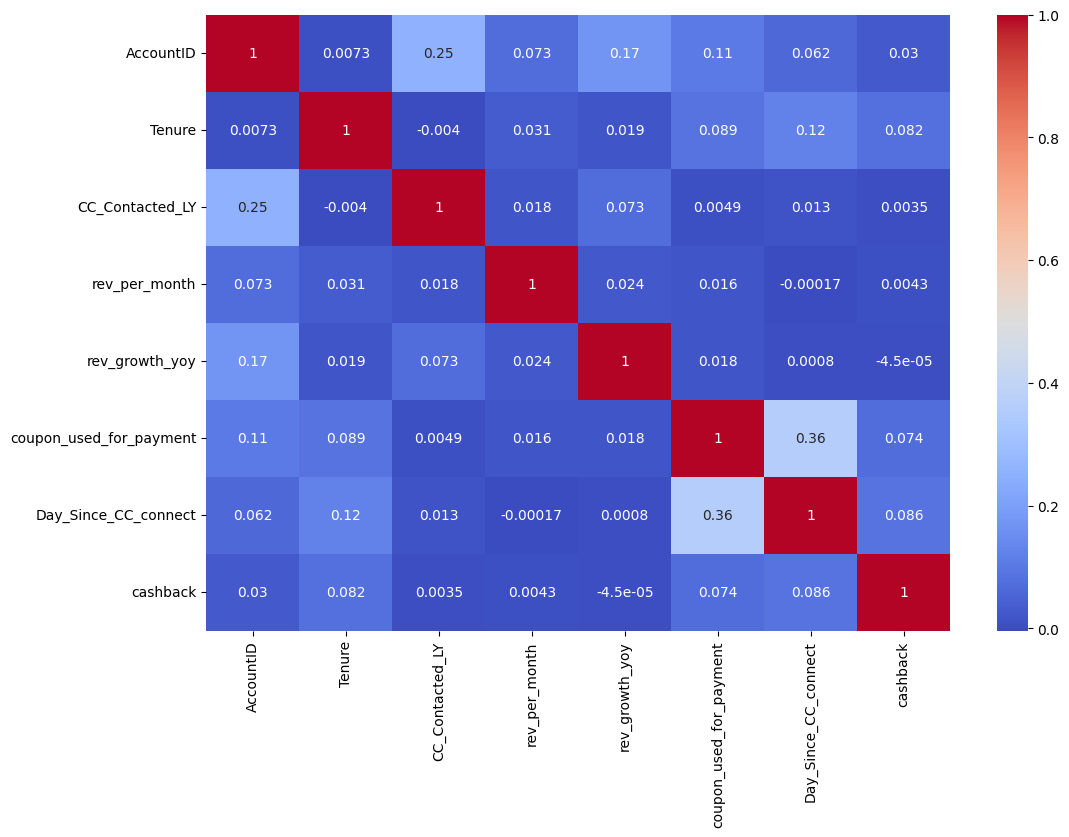

In [356]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called df
# First, convert the columns to their respective data types
df = df.astype(data_types)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# You can visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


In [357]:
df = df.astype(data_types)

In [358]:
df.Churn.value_counts(normalize=True)

0    0.831616
1    0.168384
Name: Churn, dtype: float64

#Multi-colinearity check

In [359]:
import pandas as pd

def cap_outliers(df, column_names, lower_percentile=0.01, upper_percentile=0.99):

    for column_name in column_names:
        lower_limit = df[column_name].quantile(lower_percentile)
        upper_limit = df[column_name].quantile(upper_percentile)

        df[column_name] = df[column_name].clip(lower_limit, upper_limit)

    return df

# Example usage:
# Assuming you have a DataFrame 'df' and you want to cap outliers in multiple columns
columns_to_cap = ['Tenure', 'CC_Contacted_LY', 'rev_per_month', 'rev_growth_yoy', 'coupon_used_for_payment', 'Day_Since_CC_connect', 'cashback']
df = cap_outliers(df, columns_to_cap)


In [360]:
df.drop('AccountID',axis=1,inplace=True)

In [361]:
#import pandas as pd

# Assuming you have your DataFrame 'df'

# List of columns to one-hot encode
#columns_to_encode = ['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']

# Perform one-hot encoding with dropping the first dummy column
#df = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Now, df_encoded contains the one-hot encoded DataFrame with one dummy column dropped


In [362]:
columns_to_encode = ['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']

In [363]:
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Dictionary to store mappings
encoding_mappings = {}

# Iterate through the columns you want to label encode
for column in columns_to_encode:
    # Fit the LabelEncoder on the unique values in the column
    label_encoder.fit(df[column])

    # Transform the column with label encoding
    df[column] = label_encoder.transform(df[column])

    # Store the mapping
    encoding_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the encoding mappings
for column, mapping in encoding_mappings.items():
    print(f"Encoding mapping for {column}: {mapping}")


Encoding mapping for Payment: {'Cash on Delivery': 0, 'Credit Card': 1, 'Debit Card': 2, 'E wallet': 3, 'UPI': 4}
Encoding mapping for Gender: {'Female': 0, 'Male': 1}
Encoding mapping for account_segment: {'HNI': 0, 'Regular': 1, 'Regular Plus': 2, 'Super': 3, 'Super Plus': 4}
Encoding mapping for Marital_Status: {'Divorced': 0, 'Married': 1, 'Single': 2}
Encoding mapping for Login_device: {'Computer': 0, 'Mobile': 1, 'Other': 2}


In [364]:
from sklearn.preprocessing import LabelEncoder
encoding_mappings = {}
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# List of columns to label encode
columns_to_encode = ['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']

# Iterate through the columns you want to label encode
for column in columns_to_encode:
    # Fit the LabelEncoder on the unique values in the column
    label_encoder.fit(df[column])

    # Transform the column with label encoding
    df[column] = label_encoder.transform(df[column])




In [365]:
for column in columns_to_encode:

  encoding_mappings[column] = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the encoding mappings
for column, mapping in encoding_mappings.items():
    print(f"Encoding mapping for {column}: {mapping}")

Encoding mapping for Payment: {0: 0, 1: 1, 2: 2}
Encoding mapping for Gender: {0: 0, 1: 1, 2: 2}
Encoding mapping for account_segment: {0: 0, 1: 1, 2: 2}
Encoding mapping for Marital_Status: {0: 0, 1: 1, 2: 2}
Encoding mapping for Login_device: {0: 0, 1: 1, 2: 2}


In [366]:
df

,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,1,4,3.0,6,2,0,3.0,3.0,3,2.0,2,9.0,1.0,11.0,1,5,159.0,1
1,1,0,1.0,8,4,1,3.0,4.0,2,3.0,2,7.0,1.0,15.0,0,0,120.0,1
2,1,0,1.0,30,2,1,2.0,4.0,2,3.0,2,6.0,1.0,14.0,0,3,142.0,1
3,1,0,3.0,15,2,1,2.0,4.0,3,5.0,2,8.0,0.0,23.0,0,3,134.0,1
4,1,0,1.0,12,1,1,2.0,3.0,2,5.0,2,3.0,0.0,11.0,1,3,129.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11255,0,10,1.0,34,1,1,3.0,2.0,3,1.0,1,9.0,0.0,19.0,1,4,153.0,0
11256,0,13,1.0,19,1,1,3.0,5.0,0,5.0,1,7.0,0.0,16.0,1,8,226.0,1
11257,0,1,1.0,14,2,1,3.0,2.0,3,4.0,1,7.0,1.0,22.0,1,4,191.0,1
11258,0,23,3.0,11,1,1,4.0,5.0,3,4.0,1,7.0,0.0,16.0,2,9,179.0,0


In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Churn                    11260 non-null  object 
 1   Tenure                   11260 non-null  int64  
 2   City_Tier                11260 non-null  object 
 3   CC_Contacted_LY          11260 non-null  int64  
 4   Payment                  11260 non-null  int64  
 5   Gender                   11260 non-null  int64  
 6   Service_Score            11260 non-null  object 
 7   Account_user_count       11260 non-null  object 
 8   account_segment          11260 non-null  int64  
 9   CC_Agent_Score           11260 non-null  object 
 10  Marital_Status           11260 non-null  int64  
 11  rev_per_month            11260 non-null  float64
 12  Complain_ly              11260 non-null  object 
 13  rev_growth_yoy           11260 non-null  float64
 14  coupon_used_for_paymen

In [368]:
df_encoded=df.copy()

In [369]:
import pandas as pd

# Assuming you have your DataFrame 'df'

# Identify the object (categorical) columns
object_columns = df_encoded.select_dtypes(include=['object']).columns

# Perform label encoding for each object column
for col in object_columns:
    df_encoded[col] = pd.Categorical(df_encoded[col])
    df_encoded[col] = df_encoded[col].cat.codes.astype('int')

# Now, df contains the object columns converted to integer data types


In [370]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming your dataset is stored in a DataFrame called df
# First, convert the columns to their respective data types


# Drop the target variable 'Churn' if it's in your DataFrame
X = df_encoded.drop(columns=['Churn'])
import statsmodels.api as sm
# Add a constant to the features (needed for VIF calculation)
X = sm.add_constant(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)


                    feature        VIF
0                     const  64.156594
1                    Tenure   1.107907
2                 City_Tier   1.076691
3           CC_Contacted_LY   1.016083
4                   Payment   1.067638
5                    Gender   1.009107
6             Service_Score   1.167886
7        Account_user_count   1.136697
8           account_segment   1.021167
9            CC_Agent_Score   1.012036
10           Marital_Status   1.016342
11            rev_per_month   1.060201
12              Complain_ly   1.006821
13           rev_growth_yoy   1.020899
14  coupon_used_for_payment   1.230344
15     Day_Since_CC_connect   1.255553
16                 cashback   1.258080
17             Login_device   1.004648


In [371]:
from sklearn.preprocessing import MinMaxScaler

In [372]:
scaler = MinMaxScaler()
model=scaler.fit(df_encoded)
scaled_df=model.transform(df_encoded)
df_new=pd.DataFrame(scaled_df,columns=df_encoded.columns)

In [373]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix
from warnings import filterwarnings
filterwarnings("ignore")
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [374]:
X = df_new.drop('Churn', axis=1)

# Copy target into the y dataframe.
y = df_new['Churn']

In [375]:
# Split X and y into training and test set in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=1,stratify=df_new['Churn'])

In [376]:
y_train.value_counts(normalize=True)

0.0    0.831616
1.0    0.168384
Name: Churn, dtype: float64

In [377]:
y_test.value_counts(normalize=True)

0.0    0.831616
1.0    0.168384
Name: Churn, dtype: float64

In [378]:
from imblearn.over_sampling import SMOTE

# Assuming you have already split your data into X_train and y_train

# Initialize the SMOTE object
smote = SMOTE(random_state=42)

# Apply SMOTE to X_train
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Now, X_train_resampled contains the oversampled features, and y_train_resampled contains the corresponding labels.


In [379]:
y_train_resampled.value_counts(normalize=True)

0.0    0.5
1.0    0.5
Name: Churn, dtype: float64

#LogisticRegression

In [ ]:
# Fit the Logistic Regression model
model = LogisticRegression()
model.fit(X_train_resampled, y_train_resampled)
# Accuracy - Training Data
print(model.score(X_train_resampled, y_train_resampled))
# Accuracy - Test Data
model.score(X_test, y_test)

0.7902605724049552


0.7719360568383659

In [ ]:
print(X_train_resampled.shape)
print(X_test.shape)

(14046, 17)
(2815, 17)


In [ ]:
# Training Data Class Prediction with a cut-off value of 0.5
pred_class_train = model.predict(X_train_resampled)

# Test Data Class Prediction with a cut-off value of 0.5
pred_class_test = model.predict(X_test)

In [ ]:
from sklearn.metrics import roc_auc_score

# Assuming you have predictions on train data called y_train_pred_probs
y_train_pred_probs = model.predict_proba(X_train_resampled)[:, 1]

# Calculate AUC-ROC score for train data
train_auc_roc = roc_auc_score(y_train_resampled, y_train_pred_probs)

# Assuming you have predictions on test data called y_test_pred_probs
y_test_pred_probs = model.predict_proba(X_test)[:, 1]

# Calculate AUC-ROC score for test data
test_auc_roc = roc_auc_score(y_test, y_test_pred_probs)

print("AUC-ROC Score for Training Set:", train_auc_roc)
print("AUC-ROC Score for Testing Set:", test_auc_roc)


AUC-ROC Score for Training Set: 0.8694812060427801
AUC-ROC Score for Testing Set: 0.8484698558263356


In [ ]:
print('Classification Report of the training data:\n\n',metrics.classification_report(y_train_resampled,pred_class_train),'\n')
print('Classification Report of the test data:\n\n',metrics.classification_report(y_test,pred_class_test),'\n')

Classification Report of the training data:

               precision    recall  f1-score   support

         0.0       0.80      0.77      0.79      7023
         1.0       0.78      0.81      0.79      7023

    accuracy                           0.79     14046
   macro avg       0.79      0.79      0.79     14046
weighted avg       0.79      0.79      0.79     14046
 

Classification Report of the test data:

               precision    recall  f1-score   support

         0.0       0.94      0.77      0.85      2341
         1.0       0.41      0.76      0.53       474

    accuracy                           0.77      2815
   macro avg       0.67      0.77      0.69      2815
weighted avg       0.85      0.77      0.80      2815
 



#tunning LR


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the hyperparameters you want to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization parameter
    'penalty': ['l1', 'l2']  # Regularization type
}

# Create the base model
base_model = LogisticRegression(max_iter=1000)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use the best model to make predictions
y_train_pred = best_model.predict(X_train_resampled)
y_test_pred = best_model.predict(X_test)

# Print the best parameters
print("Best Hyperparameters:", best_params)

# Print the accuracy scores
print("Accuracy on Training Set:", best_model.score(X_train_resampled, y_train_resampled))
print("Accuracy on Testing Set:", best_model.score(X_test, y_test))


Best Hyperparameters: {'C': 100, 'penalty': 'l2'}
Accuracy on Training Set: 0.7923964117898334
Accuracy on Testing Set: 0.7737122557726466


In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report for training set
train_report = classification_report(y_train_resampled, y_train_pred)

# Generate the classification report for testing set
test_report = classification_report(y_test, y_test_pred)

# Print the classification report for training set
print("\nClassification Report for Training Set:")
print(train_report)

# Print the classification report for testing set
print("\nClassification Report for Testing Set:")
print(test_report)



Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.79      7023
         1.0       0.78      0.81      0.80      7023

    accuracy                           0.79     14046
   macro avg       0.79      0.79      0.79     14046
weighted avg       0.79      0.79      0.79     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.94      0.77      0.85      2341
         1.0       0.41      0.77      0.53       474

    accuracy                           0.77      2815
   macro avg       0.68      0.77      0.69      2815
weighted avg       0.85      0.77      0.80      2815



In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate AUC-ROC score on the training set
train_auc_roc = roc_auc_score(y_train_resampled, best_model.predict_proba(X_train_resampled)[:, 1])

# Calculate AUC-ROC score on the testing set
test_auc_roc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

# Print the AUC-ROC scores
print("AUC-ROC Score on Training Set:", train_auc_roc)
print("AUC-ROC Score on Testing Set:", test_auc_roc)


AUC-ROC Score on Training Set: 0.8715990009352522
AUC-ROC Score on Testing Set: 0.8513176416728397


#DT

In [ ]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Assuming you have your training and testing data ready

# Creating and training the decision tree model
model = DecisionTreeClassifier()
model.fit(X_train_resampled, y_train_resampled)

# Making predictions on the train and test sets
y_train_pred = model.predict(X_train_resampled)
y_test_pred = model.predict(X_test)

# Generating the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports
print("Classification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)


Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7023
         1.0       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      2341
         1.0       0.76      0.81      0.78       474

    accuracy                           0.92      2815
   macro avg       0.86      0.88      0.87      2815
weighted avg       0.93      0.92      0.93      2815



In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the AUC score for the training set
train_auc = roc_auc_score(y_train_resampled, y_train_pred)

# Calculate the AUC score for the testing set
test_auc = roc_auc_score(y_test, y_test_pred)

# Print the AUC scores
print(f"AUC Score for Training Set: {train_auc}")
print(f"AUC Score for Testing Set: {test_auc}")


AUC Score for Training Set: 1.0
AUC Score for Testing Set: 0.8771099299408633


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the hyperparameters you want to tune
param_grid = {
    'criterion': ['gini', 'entropy'],

    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Create the base model
base_model = DecisionTreeClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use the best model to make predictions
y_train_pred = best_model.predict(X_train_resampled)
y_test_pred = best_model.predict(X_test)

# Generate the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports and best parameters
print("Best Hyperparameters:", best_params)

print("\nClassification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)


Best Hyperparameters: {'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7023
         1.0       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.95      2341
         1.0       0.74      0.78      0.76       474

    accuracy                           0.92      2815
   macro avg       0.85      0.86      0.86      2815
weighted avg       0.92      0.92      0.92      2815



In [ ]:
train_auc = roc_auc_score(y_train_resampled, best_model.predict_proba(X_train_resampled)[:, 1])
test_auc = roc_auc_score(y_test, best_model.predict_proba(X_test)[:, 1])

print(f"\nAUC Score for Training Set: {train_auc}")
print(f"AUC Score for Testing Set: {test_auc}")


AUC Score for Training Set: 1.0
AUC Score for Testing Set: 0.8629566145233473


#RF

In [ ]:
# Importing necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

# Assuming you have your training and testing data ready

# Creating and training the decision tree model
model = RandomForestClassifier()
model.fit(X_train_resampled, y_train_resampled)

# Making predictions on the train and test sets
y_train_pred = model.predict(X_train_resampled)
y_test_pred = model.predict(X_test)

# Generating the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports
print("Classification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)


Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7023
         1.0       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2341
         1.0       0.94      0.88      0.91       474

    accuracy                           0.97      2815
   macro avg       0.96      0.93      0.94      2815
weighted avg       0.97      0.97      0.97      2815



In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate the AUC score for the training set
train_auc = roc_auc_score(y_train_resampled, y_train_pred)

# Calculate the AUC score for the testing set
test_auc = roc_auc_score(y_test, y_test_pred)

# Print the AUC scores
print(f"AUC Score for Training Set: {train_auc}")
print(f"AUC Score for Testing Set: {test_auc}")


AUC Score for Training Set: 1.0
AUC Score for Testing Set: 0.9328382151231848


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

# Define the hyperparameters you want to tune
param_grid = {

    'max_depth': [None, 5, 10, 20],  # Maximum depth of the trees

    'min_samples_split': [2, 5, 10],  # Minimum samples required to split an internal node

    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node

    'max_features': ['auto', 'sqrt', 'log2'],  # Number of features to consider when looking for the best split

    'criterion': ['gini', 'entropy'],  # Function to measure the quality of a split

}

# Create the base model
base_model = RandomForestClassifier()

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use the best model to make predictions
y_train_pred = best_model.predict(X_train_resampled)
y_test_pred = best_model.predict(X_test)

# Generate the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports and best parameters
print("Best Hyperparameters:", best_params)

print("\nClassification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2}

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7023
         1.0       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98      2341
         1.0       0.94      0.88      0.91       474

    accuracy                           0.97      2815
   macro avg       0.96      0.93      0.94      2815
weighted avg       0.97      0.97      0.97      2815



In [31]:
y_train_pred_proba = best_model.predict_proba(X_train_resampled)[:, 1]
y_test_pred_proba = best_model.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC scores
auc_roc_train = roc_auc_score(y_train_resampled, y_train_pred_proba)
auc_roc_test = roc_auc_score(y_test, y_test_pred_proba)

# Printing the AUC-ROC scores
print("\nAUC-ROC Score for Training Set:", auc_roc_train)
print("AUC-ROC Score for Testing Set:", auc_roc_test)


AUC-ROC Score for Training Set: 1.0
AUC-ROC Score for Testing Set: 0.9907451465978871


Bagging

In [32]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create the base estimator (Decision Tree Classifier in this case)
base_estimator = DecisionTreeClassifier()

# Create the BaggingClassifier
bagging_model = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Train the model
bagging_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the train and test sets
y_train_pred = bagging_model.predict(X_train_resampled)
y_test_pred = bagging_model.predict(X_test)

# Generate the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports
print("\nClassification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)



Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7023
         1.0       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      2341
         1.0       0.87      0.81      0.84       474

    accuracy                           0.95      2815
   macro avg       0.92      0.90      0.91      2815
weighted avg       0.95      0.95      0.95      2815



In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create the base estimator (Decision Tree Classifier in this case)
base_estimator = DecisionTreeClassifier()

# Create the BaggingClassifier
bagging_model = BaggingClassifier(base_estimator=base_estimator, n_estimators=200, random_state=42)

# Train the model
bagging_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the train and test sets
y_train_probs = bagging_model.predict_proba(X_train_resampled)[:, 1]
y_test_probs = bagging_model.predict_proba(X_test)[:, 1]

# Set a custom threshold (e.g., 0.7)
custom_threshold = 0.5

# Apply the custom threshold
y_train_pred = (y_train_probs >= custom_threshold).astype(int)
y_test_pred = (y_test_probs >= custom_threshold).astype(int)

# Generate the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports
print("\nClassification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)



Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7023
         1.0       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      2341
         1.0       0.88      0.88      0.88       474

    accuracy                           0.96      2815
   macro avg       0.93      0.93      0.93      2815
weighted avg       0.96      0.96      0.96      2815



In [35]:
y_train_pred_proba = bagging_model.predict_proba(X_train_resampled)[:, 1]
y_test_pred_proba = bagging_model.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC scores
auc_roc_train = roc_auc_score(y_train_resampled, y_train_pred_proba)
auc_roc_test = roc_auc_score(y_test, y_test_pred_proba)

# Printing the AUC-ROC scores
print("\nAUC-ROC Score for Training Set:", auc_roc_train)
print("AUC-ROC Score for Testing Set:", auc_roc_test)


AUC-ROC Score for Training Set: 1.0
AUC-ROC Score for Testing Set: 0.9846507947665627


In [36]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Create the base estimator (Decision Tree Classifier in this case)
base_estimator = DecisionTreeClassifier()

# Create the BaggingClassifier
bagging_model = BaggingClassifier(base_estimator=base_estimator, random_state=42)

# Define the hyperparameters you want to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=bagging_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the train and test sets
y_train_pred = best_model.predict(X_train_resampled)
y_test_pred = best_model.predict(X_test)

# Generate the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports and best parameters
print("Best Hyperparameters:", best_params)

print("\nClassification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)


Best Hyperparameters: {'max_features': 0.7, 'max_samples': 1.0, 'n_estimators': 300}

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7023
         1.0       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2341
         1.0       0.96      0.85      0.90       474

    accuracy                           0.97      2815
   macro avg       0.97      0.92      0.94      2815
weighted avg       0.97      0.97      0.97      2815



In [39]:
from sklearn.metrics import roc_auc_score

# Get the predicted probabilities for the positive class
y_train_probs = best_model.predict_proba(X_train_resampled)[:, 1]
y_test_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate the AUC score
train_auc = roc_auc_score(y_train_resampled, y_train_probs)
test_auc = roc_auc_score(y_test, y_test_probs)

# Printing the AUC scores
print("AUC Score for Training Set:", train_auc)
print("AUC Score for Testing Set:", test_auc)


AUC Score for Training Set: 1.0
AUC Score for Testing Set: 0.9941435644545858


ADAboost

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Create the base estimator (Decision Tree Classifier in this case)
base_estimator = DecisionTreeClassifier()  # Adjust max_depth as needed

# Create the AdaBoostClassifier
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Train the model
adaboost_model.fit(X_train_resampled, y_train_resampled)

# Get the raw decision function scores for the train and test sets
train_scores = adaboost_model.decision_function(X_train_resampled)
test_scores = adaboost_model.decision_function(X_test)

# Set a custom threshold (e.g., 0.25)
custom_threshold = 0.5

# Apply the custom threshold to get binary predictions
y_train_pred = (train_scores >= custom_threshold).astype(int)
y_test_pred = (test_scores >= custom_threshold).astype(int)

# Generate the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports
print("\nClassification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)



Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7023
         1.0       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      2341
         1.0       0.77      0.83      0.80       474

    accuracy                           0.93      2815
   macro avg       0.87      0.89      0.88      2815
weighted avg       0.93      0.93      0.93      2815



In [40]:
from sklearn.metrics import roc_auc_score

# Get the raw decision function scores for the train and test sets
train_scores = adaboost_model.decision_function(X_train_resampled)
test_scores = adaboost_model.decision_function(X_test)

# Calculate the AUC score
train_auc = roc_auc_score(y_train_resampled, train_scores)
test_auc = roc_auc_score(y_test, test_scores)

# Printing the AUC scores
print("AUC Score for Training Set:", train_auc)
print("AUC Score for Testing Set:", test_auc)


AUC Score for Training Set: 1.0
AUC Score for Testing Set: 0.8897812251607287


In [41]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Create the base estimator (Decision Tree Classifier in this case)
base_estimator = DecisionTreeClassifier()  # Adjust max_depth as needed

# Create the AdaBoostClassifier
adaboost_model = AdaBoostClassifier(base_estimator=base_estimator, random_state=42)

# Define the hyperparameters you want to tune
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of weak learners
    'learning_rate': [0.01, 0.1, 1.0]  # Contribution of each weak learner
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=adaboost_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Get the raw decision function scores for the train and test sets
train_scores = best_model.decision_function(X_train_resampled)
test_scores = best_model.decision_function(X_test)

# Set a custom threshold (e.g., 0.5)
custom_threshold = 0.5

# Apply the custom threshold to get binary predictions
y_train_pred = (train_scores >= custom_threshold).astype(int)
y_test_pred = (test_scores >= custom_threshold).astype(int)

# Generate the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports and best parameters
print("Best Hyperparameters:", best_params)

print("\nClassification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)


Best Hyperparameters: {'learning_rate': 0.01, 'n_estimators': 50}

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7023
         1.0       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.96      0.95      0.96      2341
         1.0       0.77      0.83      0.80       474

    accuracy                           0.93      2815
   macro avg       0.87      0.89      0.88      2815
weighted avg       0.93      0.93      0.93      2815



In [42]:
train_auc_score = roc_auc_score(y_train_resampled, train_scores)

# Calculate AUC-ROC score for testing set
test_auc_score = roc_auc_score(y_test, test_scores)

# Print AUC-ROC scores
print("\nAUC-ROC Score for Training Set:", train_auc_score)
print("AUC-ROC Score for Testing Set:", test_auc_score)


AUC-ROC Score for Training Set: 1.0
AUC-ROC Score for Testing Set: 0.8897812251607287


XG boost

In [189]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Create the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the train and test sets
y_train_probs = xgb_model.predict_proba(X_train_resampled)[:, 1]
y_test_probs = xgb_model.predict_proba(X_test)[:, 1]

# Set a custom threshold (e.g., 0.25)
custom_threshold = 0.25

# Apply the custom threshold
y_train_pred = (y_train_probs >= custom_threshold).astype(int)
y_test_pred = (y_test_probs >= custom_threshold).astype(int)

# Generate the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports
print("\nClassification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)



Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      7023
         1.0       0.99      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.98      0.97      0.98      2341
         1.0       0.86      0.92      0.89       474

    accuracy                           0.96      2815
   macro avg       0.92      0.95      0.93      2815
weighted avg       0.96      0.96      0.96      2815



In [190]:
train_auc_score = roc_auc_score(y_train_resampled, y_train_probs)

# Calculate AUC-ROC score for testing set
test_auc_score = roc_auc_score(y_test, y_test_probs)

# Print AUC-ROC scores
print("\nAUC-ROC Score for Training Set:", train_auc_score)
print("AUC-ROC Score for Testing Set:", test_auc_score)


AUC-ROC Score for Training Set: 0.9999893355022407
AUC-ROC Score for Testing Set: 0.9882186378571672


In [45]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [300],
    'max_depth': [3, 4, 5,6,7,8,9,10],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Create the XGBoost Classifier
xgb_model = XGBClassifier(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, scoring='accuracy', cv=5)

# Train the model
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the train and test sets
y_train_probs = best_model.predict_proba(X_train_resampled)[:, 1]
y_test_probs = best_model.predict_proba(X_test)[:, 1]

# Set a custom threshold (e.g., 0.25)
custom_threshold = 0.5

# Apply the custom threshold
y_train_pred = (y_train_probs >= custom_threshold).astype(int)
y_test_pred = (y_test_probs >= custom_threshold).astype(int)

# Generate the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports and best parameters
print("Best Hyperparameters:", best_params)

print("\nClassification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7023
         1.0       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      2341
         1.0       0.97      0.90      0.94       474

    accuracy                           0.98      2815
   macro avg       0.98      0.95      0.96      2815
weighted avg       0.98      0.98      0.98      2815



In [383]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

# Create the XGBoost Classifier
xgb_model = XGBClassifier(n_estimators= 300,random_state=42)

# Train the model
xgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the train and test sets
y_train_probs = xgb_model.predict_proba(X_train_resampled)[:, 1]
y_test_probs = xgb_model.predict_proba(X_test)[:, 1]

# Set a custom threshold (e.g., 0.25)
custom_threshold = 0.15

# Apply the custom threshold
y_train_pred = (y_train_probs >= custom_threshold).astype(int)
y_test_pred = (y_test_probs >= custom_threshold).astype(int)

# Generate the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports
print("\nClassification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)



Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7023
         1.0       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.98      2341
         1.0       0.91      0.95      0.93       474

    accuracy                           0.97      2815
   macro avg       0.95      0.96      0.96      2815
weighted avg       0.98      0.97      0.97      2815



In [75]:
import matplotlib.pyplot as plt

In [77]:
xgb_model.feature_importances_

array([0.21522914, 0.04349194, 0.02322429, 0.02825629, 0.0192298 ,
       0.0261136 , 0.1067938 , 0.06330141, 0.05126729, 0.0566631 ,
       0.05206544, 0.13467908, 0.02820427, 0.05905667, 0.03346634,
       0.01445717, 0.04450038], dtype=float32)

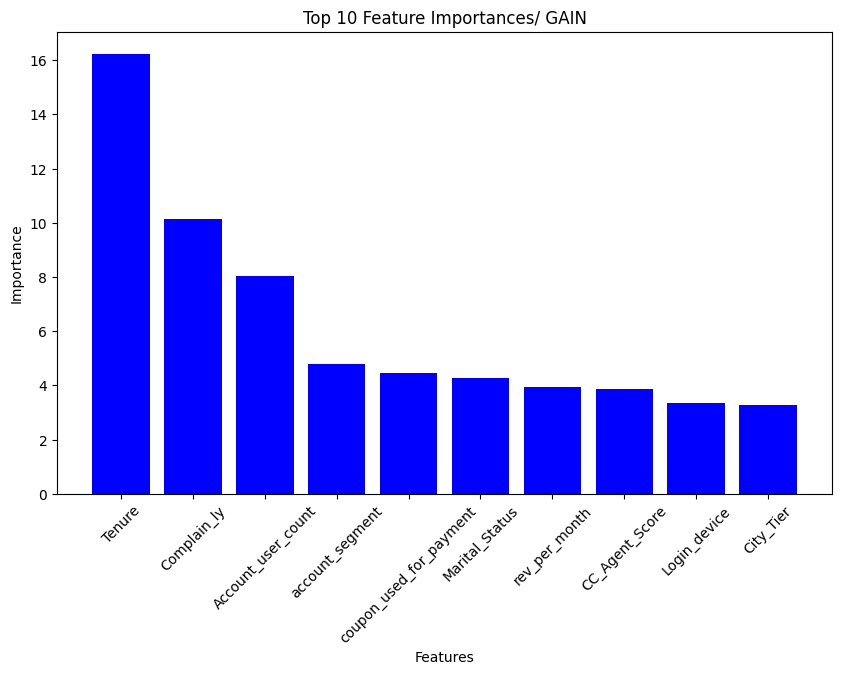

In [395]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Assuming you have a trained XGBoost model stored in the variable 'xgb_model'
# and you have already obtained the feature importances

# Get feature importance using built-in XGBoost function
importance_type = 'gain'  # 'gain' is used to indicate the average gain of a feature
feature_importances = xgb_model.get_booster().get_score(importance_type=importance_type)

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Extract the top five features and their importance scores
top_five_features = sorted_feature_importances[:10]
features, importances = zip(*top_five_features)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(features, importances, color='blue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Top 10 Feature Importances/ GAIN')
plt.xticks(rotation=45)
plt.show()




In [397]:
# Get feature importance using built-in XGBoost function
importance_type = 'gain'  # Change to 'total_gain' to indicate the product of frequency and gain
feature_importances = xgb_model.get_booster().get_score(importance_type=importance_type)

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the top features
for feature, importance in sorted_feature_importances:
    print(f"Feature: {feature}, Importance: {importance}")



Feature: Tenure, Importance: 16.237136840820312
Feature: Complain_ly, Importance: 10.160346031188965
Feature: Account_user_count, Importance: 8.056648254394531
Feature: account_segment, Importance: 4.775531768798828
Feature: coupon_used_for_payment, Importance: 4.455304145812988
Feature: Marital_Status, Importance: 4.2747297286987305
Feature: rev_per_month, Importance: 3.927877426147461
Feature: CC_Agent_Score, Importance: 3.867663860321045
Feature: Login_device, Importance: 3.3571605682373047
Feature: City_Tier, Importance: 3.2810823917388916
Feature: Day_Since_CC_connect, Importance: 2.5247395038604736
Feature: Payment, Importance: 2.1316874027252197
Feature: rev_growth_yoy, Importance: 2.12776255607605
Feature: Service_Score, Importance: 1.9700404405593872
Feature: CC_Contacted_LY, Importance: 1.7520675659179688
Feature: Gender, Importance: 1.4507184028625488
Feature: cashback, Importance: 1.0906658172607422


In [82]:
# Get feature importance using built-in XGBoost function
importance_type = 'total_gain'  # Change to 'total_gain' to indicate the product of frequency and gain
feature_importances = xgb_model.get_booster().get_score(importance_type=importance_type)

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the top features
for feature, importance in sorted_feature_importances:
    print(f"Feature: {feature}, Importance: {importance}")



Feature: Tenure, Importance: 13411.875
Feature: rev_per_month, Importance: 2733.802734375
Feature: Account_user_count, Importance: 2634.52392578125
Feature: CC_Agent_Score, Importance: 2513.9814453125
Feature: Complain_ly, Importance: 2021.9088134765625
Feature: Day_Since_CC_connect, Importance: 1901.1287841796875
Feature: rev_growth_yoy, Importance: 1804.3426513671875
Feature: coupon_used_for_payment, Importance: 1541.5352783203125
Feature: CC_Contacted_LY, Importance: 1540.0673828125
Feature: account_segment, Importance: 1365.8021240234375
Feature: Marital_Status, Importance: 1265.320068359375
Feature: cashback, Importance: 1226.9990234375
Feature: Payment, Importance: 1087.1605224609375
Feature: City_Tier, Importance: 794.0219116210938
Feature: Login_device, Importance: 735.2181396484375
Feature: Service_Score, Importance: 555.5513916015625
Feature: Gender, Importance: 393.1446838378906


In [85]:
# Get feature importance using built-in XGBoost function
importance_type = 'cover'  # Change to 'total_gain' to indicate the product of frequency and gain
feature_importances = xgb_model.get_booster().get_score(importance_type=importance_type)

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Print the top features
for feature, importance in sorted_feature_importances:
    print(f"Feature: {feature}, Importance: {importance}")



Feature: Complain_ly, Importance: 175.4073486328125
Feature: Account_user_count, Importance: 124.99107360839844
Feature: Tenure, Importance: 102.43067169189453
Feature: rev_per_month, Importance: 86.81654357910156
Feature: coupon_used_for_payment, Importance: 75.60319519042969
Feature: account_segment, Importance: 65.74039459228516
Feature: Marital_Status, Importance: 61.65998458862305
Feature: Login_device, Importance: 52.21696090698242
Feature: Service_Score, Importance: 51.29804611206055
Feature: Day_Since_CC_connect, Importance: 46.32386016845703
Feature: Payment, Importance: 44.41229248046875
Feature: rev_growth_yoy, Importance: 43.144004821777344
Feature: City_Tier, Importance: 41.6357421875
Feature: cashback, Importance: 39.364192962646484
Feature: CC_Agent_Score, Importance: 38.59601974487305
Feature: CC_Contacted_LY, Importance: 35.25288772583008
Feature: Gender, Importance: 20.865253448486328


In [86]:
from sklearn.metrics import roc_auc_score
from sklearn.inspection import permutation_importance

# Assuming you have a trained xgb_model and X_test data

# Define a custom scoring function based on AUC-ROC
def custom_scorer(model, X, y):
    y_probs = model.predict_proba(X)[:, 1]
    return roc_auc_score(y, y_probs)

# Calculate permutation feature importance
perm_importance = permutation_importance(xgb_model, X_test, y_test, n_repeats=30, random_state=0, scoring=custom_scorer)

# Get the feature importances
sorted_indices = perm_importance.importances_mean.argsort()[::-1]

# Print the top features
for idx in sorted_indices:
    print(f"Feature: {X_test.columns[idx]}, Importance: {perm_importance.importances_mean[idx]:.4f}")


Feature: Tenure, Importance: 0.1545
Feature: Complain_ly, Importance: 0.0439
Feature: CC_Agent_Score, Importance: 0.0185
Feature: Day_Since_CC_connect, Importance: 0.0169
Feature: rev_per_month, Importance: 0.0130
Feature: account_segment, Importance: 0.0123
Feature: Payment, Importance: 0.0111
Feature: cashback, Importance: 0.0110
Feature: Marital_Status, Importance: 0.0106
Feature: rev_growth_yoy, Importance: 0.0100
Feature: City_Tier, Importance: 0.0082
Feature: CC_Contacted_LY, Importance: 0.0082
Feature: Account_user_count, Importance: 0.0066
Feature: Login_device, Importance: 0.0043
Feature: coupon_used_for_payment, Importance: 0.0037
Feature: Gender, Importance: 0.0036
Feature: Service_Score, Importance: 0.0018


In [88]:
pip install shap


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 5.0 MB/s eta 0:00:00


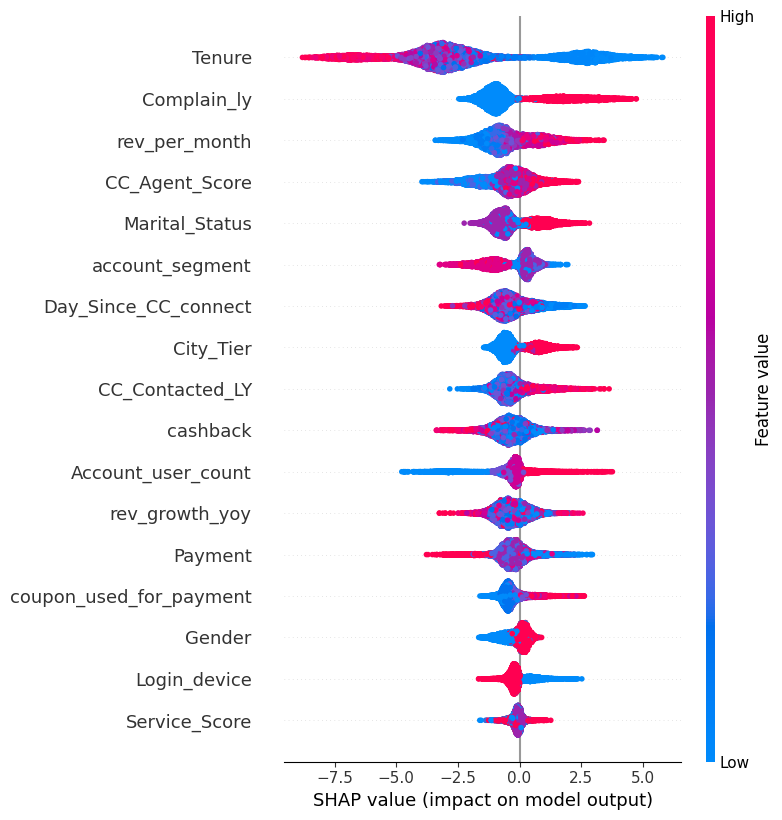

In [89]:
import shap

# Assuming xgb_model is already trained
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X)

# Summary plot
shap.summary_plot(shap_values, X)



In [72]:
train_auc_score = roc_auc_score(y_train_resampled, y_train_probs)

# Calculate AUC-ROC score for testing set
test_auc_score = roc_auc_score(y_test, y_test_probs)

# Print AUC-ROC scores
print("\nAUC-ROC Score for Training Set:", train_auc_score)
print("AUC-ROC Score for Testing Set:", test_auc_score)


AUC-ROC Score for Training Set: 1.0
AUC-ROC Score for Testing Set: 0.9941629402127189


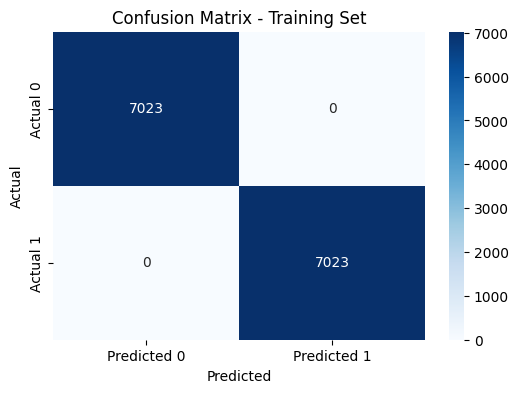

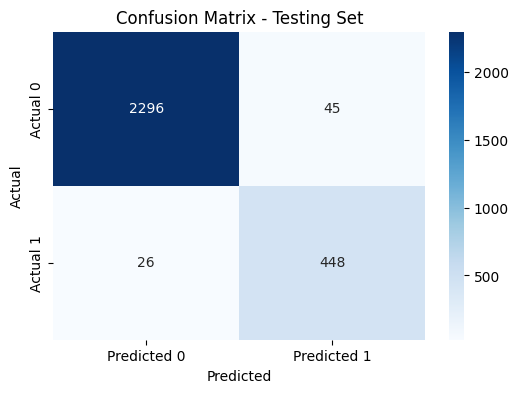

In [381]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion Matrix for Training Set
confusion_train = confusion_matrix(y_train_resampled, y_train_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_train, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Training Set')
plt.show()

# Confusion Matrix for Testing Set
confusion_test = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_test, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Testing Set')
plt.show()


In [382]:
confusion_test

array([[2296,   45],
       [  26,  448]])

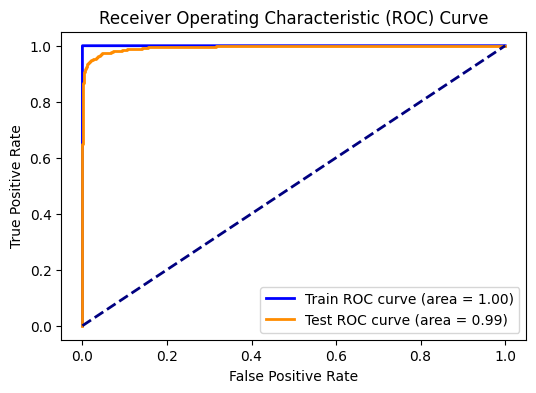

In [67]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate AUC-ROC for Training Set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resampled, y_train_probs)
roc_auc_train = roc_auc_score(y_train_resampled, y_train_probs)

# Calculate AUC-ROC for Testing Set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_probs)
roc_auc_test = roc_auc_score(y_test, y_test_probs)

# Plotting AUC-ROC Curve
plt.figure(figsize=(6, 4))
plt.plot(fpr_train, tpr_train, color='blue', lw=2, label='Train ROC curve (area = %0.2f)' % roc_auc_train)
plt.plot(fpr_test, tpr_test, color='darkorange', lw=2, label='Test ROC curve (area = %0.2f)' % roc_auc_test)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


Light GBM

In [74]:
import lightgbm as lgb
from sklearn.metrics import classification_report

# Create the LightGBM Classifier
lgb_model = lgb.LGBMClassifier( random_state=42)

# Train the model
lgb_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the train and test sets
y_train_probs = lgb_model.predict_proba(X_train_resampled)[:, 1]
y_test_probs = lgb_model.predict_proba(X_test)[:, 1]

# Set a custom threshold (e.g., 0.25)
custom_threshold = 0.5

# Apply the custom threshold
y_train_pred = (y_train_probs >= custom_threshold).astype(int)
y_test_pred = (y_test_probs >= custom_threshold).astype(int)

# Generate the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports
print("\nClassification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)


[LightGBM] [Info] Number of positive: 7023, number of negative: 7023
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001489 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3590
[LightGBM] [Info] Number of data points in the train set: 14046, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99      7023
         1.0       0.99      0.98      0.99      7023

    accuracy                           0.99     14046
   macro avg       0.99      0.99      0.99     14046
weighted avg       0.99      0.99      0.99     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.96      0.98

In [75]:
train_auc_score = roc_auc_score(y_train_resampled, y_train_probs)

# Calculate AUC-ROC score for testing set
test_auc_score = roc_auc_score(y_test, y_test_probs)

# Print AUC-ROC scores
print("\nAUC-ROC Score for Training Set:", train_auc_score)
print("AUC-ROC Score for Testing Set:", test_auc_score)


AUC-ROC Score for Training Set: 0.9990709924870236
AUC-ROC Score for Testing Set: 0.9784956120666815


In [78]:
import lightgbm as lgb
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters you want to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Create the base model
base_model = lgb.LGBMClassifier(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the train and test sets
y_train_probs = best_model.predict_proba(X_train_resampled)[:, 1]
y_test_probs = best_model.predict_proba(X_test)[:, 1]

# Set a custom threshold (e.g., 0.5)
custom_threshold = 0.2

# Apply the custom threshold
y_train_pred = (y_train_probs >= custom_threshold).astype(int)
y_test_pred = (y_test_probs >= custom_threshold).astype(int)

# Generate the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports and best parameters
print("Best Hyperparameters:", best_params)

print("\nClassification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 7023, number of negative: 7023
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002437 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3590
[LightGBM] [Info] Number of data points in the train set: 14046, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

In [77]:
train_auc = roc_auc_score(y_train_resampled, y_train_probs)

# Calculate AUC score for testing set
test_auc = roc_auc_score(y_test, y_test_probs)

# Printing the AUC scores
print("AUC Score for Training Set:", train_auc)
print("AUC Score for Testing Set:", test_auc)

AUC Score for Training Set: 1.0
AUC Score for Testing Set: 0.9922316727858014


In [36]:
pip install catboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.8 MB/s eta 0:00:00


In [82]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report

# Create the CatBoost Classifier
catboost_model = CatBoostClassifier( random_state=42, verbose=0)

# Train the model
catboost_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the train and test sets
y_train_probs = catboost_model.predict_proba(X_train_resampled)[:, 1]
y_test_probs = catboost_model.predict_proba(X_test)[:, 1]

# Set a custom threshold (e.g., 0.25)
custom_threshold = 0.5

# Apply the custom threshold
y_train_pred = (y_train_probs >= custom_threshold).astype(int)
y_test_pred = (y_test_probs >= custom_threshold).astype(int)

# Generate the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports
print("\nClassification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)



Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      7023
         1.0       1.00      0.99      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98      2341
         1.0       0.93      0.86      0.89       474

    accuracy                           0.96      2815
   macro avg       0.95      0.92      0.94      2815
weighted avg       0.96      0.96      0.96      2815



In [81]:
from sklearn.metrics import roc_auc_score

# Calculate AUC score for training set
train_auc = roc_auc_score(y_train_resampled, y_train_probs)

# Calculate AUC score for testing set
test_auc = roc_auc_score(y_test, y_test_probs)

# Printing the AUC scores
print("AUC Score for Training Set:", train_auc)
print("AUC Score for Testing Set:", test_auc)


AUC Score for Training Set: 0.9998585027949397
AUC Score for Testing Set: 0.9883502127728603


In [83]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import GridSearchCV

# Define the hyperparameters you want to tune
param_grid = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'iterations': [100, 200, 300]
}

# Create the base model
base_model = CatBoostClassifier(random_state=42, verbose=0)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=base_model, param_grid=param_grid,
                           scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train_resampled, y_train_resampled)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Make predictions on the train and test sets
y_train_probs = best_model.predict_proba(X_train_resampled)[:, 1]
y_test_probs = best_model.predict_proba(X_test)[:, 1]

# Calculate AUC score for training set
train_auc = roc_auc_score(y_train_resampled, y_train_probs)

# Calculate AUC score for testing set
test_auc = roc_auc_score(y_test, y_test_probs)

# Set a custom threshold (e.g., 0.5)
custom_threshold = 0.5

# Apply the custom threshold
y_train_pred = (y_train_probs >= custom_threshold).astype(int)
y_test_pred = (y_test_probs >= custom_threshold).astype(int)

# Generate the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports and best parameters
print("Best Hyperparameters:", best_params)

print("\nClassification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)

# Printing the AUC scores
print("\nAUC Score for Training Set:", train_auc)
print("AUC Score for Testing Set:", test_auc)


Best Hyperparameters: {'depth': 8, 'iterations': 300, 'learning_rate': 0.2}

Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7023
         1.0       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99      2341
         1.0       0.98      0.91      0.94       474

    accuracy                           0.98      2815
   macro avg       0.98      0.95      0.97      2815
weighted avg       0.98      0.98      0.98      2815


AUC Score for Training Set: 1.0
AUC Score for Testing Set: 0.9960572585194758


In [273]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Create the CatBoost Classifier with specified hyperparameters
catboost_model = CatBoostClassifier(
    depth=8,
    iterations=300,
    learning_rate=0.2,
    random_state=42,
    verbose=0
)

# Train the model
catboost_model.fit(X_train_resampled, y_train_resampled)

# Make predictions on the train and test sets
y_train_probs = catboost_model.predict_proba(X_train_resampled)[:, 1]
y_test_probs = catboost_model.predict_proba(X_test)[:, 1]

# Set a custom threshold (e.g., 0.5)
custom_threshold = 0.22

# Apply the custom threshold
y_train_pred = (y_train_probs >= custom_threshold).astype(int)
y_test_pred = (y_test_probs >= custom_threshold).astype(int)

# Generate the classification reports
train_report = classification_report(y_train_resampled, y_train_pred)
test_report = classification_report(y_test, y_test_pred)

# Printing the reports
print("\nClassification Report for Training Set:")
print(train_report)

print("\nClassification Report for Testing Set:")
print(test_report)

# Calculate AUC score for training set
train_auc = roc_auc_score(y_train_resampled, y_train_probs)

# Calculate AUC score for testing set
test_auc = roc_auc_score(y_test, y_test_probs)

# Printing the AUC scores
print("\nAUC Score for Training Set:", train_auc)
print("AUC Score for Testing Set:", test_auc)



Classification Report for Training Set:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      7023
         1.0       1.00      1.00      1.00      7023

    accuracy                           1.00     14046
   macro avg       1.00      1.00      1.00     14046
weighted avg       1.00      1.00      1.00     14046


Classification Report for Testing Set:
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99      2341
         1.0       0.92      0.96      0.94       474

    accuracy                           0.98      2815
   macro avg       0.96      0.97      0.97      2815
weighted avg       0.98      0.98      0.98      2815


AUC Score for Training Set: 1.0
AUC Score for Testing Set: 0.9960572585194758


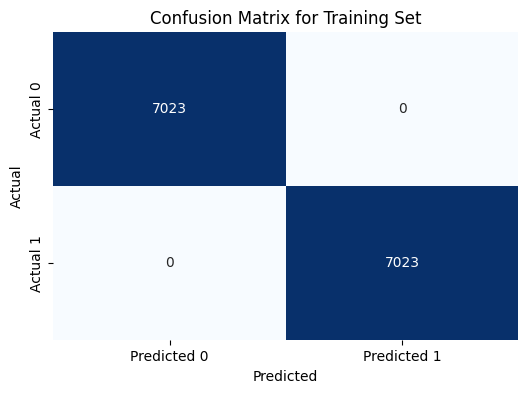

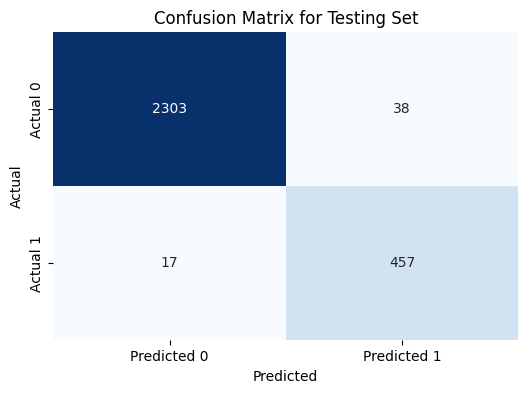

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define a function to plot confusion matrix
def plot_confusion_matrix(matrix, title):
    plt.figure(figsize=(6, 4))
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Calculate the confusion matrix for the training set
train_confusion_matrix = confusion_matrix(y_train_resampled, y_train_pred)

# Calculate the confusion matrix for the test set
test_confusion_matrix = confusion_matrix(y_test, y_test_pred)

# Print the confusion matrices with color
plot_confusion_matrix(train_confusion_matrix, "Confusion Matrix for Training Set")
plot_confusion_matrix(test_confusion_matrix, "Confusion Matrix for Testing Set")


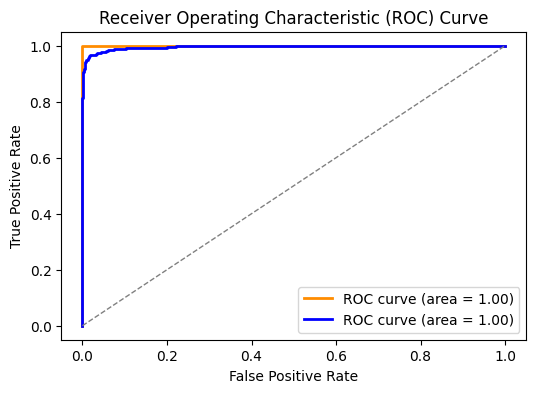

In [99]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get the ROC curve values for training set
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_resampled, y_train_probs)

# Get the ROC curve values for test set
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_probs)

# Calculate the area under the ROC curve (AUC) for training set
roc_auc_train = auc(fpr_train, tpr_train)

# Calculate the area under the ROC curve (AUC) for test set
roc_auc_test = auc(fpr_test, tpr_test)

# Plot the ROC curves
plt.figure(figsize=(6, 4))
plt.plot(fpr_train, tpr_train, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_train))
plt.plot(fpr_test, tpr_test, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc_test))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [73]:
from catboost import CatBoostClassifier, Pool, EFstrType

# Assuming you have already trained the CatBoostClassifier and have your data in X_train_resampled and y_train_resampled

# Create a Pool for the training data
train_pool = Pool(X_train_resampled, y_train_resampled)

# Get feature importances
feature_importance = catboost_model.get_feature_importance(
    data=train_pool,
    type=EFstrType.LossFunctionChange,
    prettified=False,
    thread_count=-1,
    verbose=False
)

# Get the feature names
feature_names = catboost_model.feature_names_

# Combine feature names with their corresponding importance scores
feature_importance_dict = dict(zip(feature_names, feature_importance))

# Sort the features by importance (descending order)
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the feature importance
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


Tenure: 0.04592581731878642
Complain_ly: 0.01018758128828869
CC_Agent_Score: 0.00478788449369676
Marital_Status: 0.0036865312511265035
rev_per_month: 0.003188273093556963
Day_Since_CC_connect: 0.0028758438877982124
account_segment: 0.00273464281935963
City_Tier: 0.0022543811552959646
Payment: 0.0021433011319899674
Account_user_count: 0.002068464980454394
rev_growth_yoy: 0.00202444948526439
CC_Contacted_LY: 0.0019893660883205703
coupon_used_for_payment: 0.0015224015076932243
cashback: 0.0012475507689941995
Login_device: 0.0011683145949811058
Gender: 0.00108648358679338
Service_Score: 0.0006960357708964177


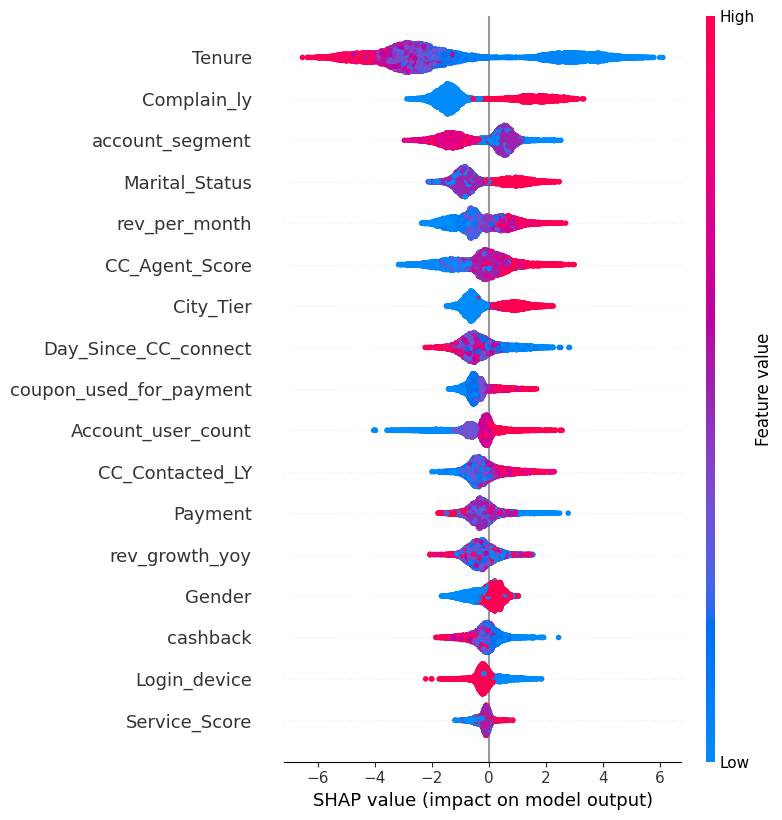

In [274]:
import shap

# Assuming xgb_model is already trained
explainer = shap.Explainer(catboost_model)
shap_values = explainer(X)

# Summary plot
shap.summary_plot(shap_values, X)
